# Logistic Regression on Fashion MNIST

Logistic regression is a statistical method for predicting binary classes. This model first loads and prepares the data, normalizing and splitting it afterwards. The Logistic Regression model was launched using Tensorflow.

In [ ]:
# importing necessary libraries
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from numpy.random import seed
seed(42)
tf.random.set_seed(42)
import random
import os

%matplotlib inline
%load_ext tensorboard
#%reload_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


**Data Pre-Processing**

First, Google drive was mounted to Google Colab for future accessing and reading the Fashion MNIST dataset

In [ ]:
from  google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


To import and read our dataset, pandas read_csv function is used:

In [ ]:
df_train_initial = pd.read_csv('gdrive/My Drive/fashion-mnist_train.csv', sep=',', header=None, low_memory=False)

In [ ]:
df_test_initial = pd.read_csv('gdrive/My Drive/fashion-mnist_test.csv', sep=',', header=None, low_memory=False)

In [ ]:
df_train_initial.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
4,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0


In [ ]:
df_test_initial.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
1,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
4,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0


X and Y components were formatted into np.array datatype

In [ ]:
df_fmnist_train = df_train_initial.iloc[1:].astype(int)
x_train = df_fmnist_train.drop([0], axis=1).values
y_train = df_fmnist_train[0].values

df_fmnist_test = df_test_initial.iloc[1:].astype(int)
x_test = df_fmnist_test.drop([0], axis=1).values
y_test = df_fmnist_test[0].values

In [ ]:
df_fmnist_test.shape

(10000, 785)

In [ ]:
df_fmnist_train.shape

(60000, 785)

**Visulaisation**

Illustration of the random picture from the dataset to check the data:

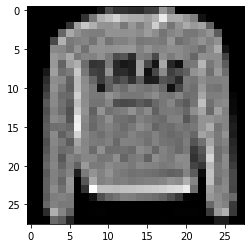

In [ ]:
picture_data = x_train[random.randint(0, x_train.shape[0])]
picture_data = np.asarray(data).reshape([28, 28]) # was reshaped to 28x28 because each example is a 28x28 grayscale image
plt.imshow(picture_data, cmap='gray')
plt.show()


In this step, we initialize the model parameters. num_classes denotes the number of outputs, which is 10.

Also, using tensorflow's keras to_categorical to convert a class vector (integers) to binary class matrix.


In [ ]:
# X was normalized and Y was moved to one-hot representation 

x_train = x_train/255
x_test = x_test/255
num_classes = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# splitting the data
x_train, x_valid, y_train, y_valid = train_test_split(
x_train, y_train,
test_size=0.2, random_state=12
)

**Logistic Regression Model**

We define the sgd (Stohastic Gradient Descent) function and so logistic regression model, which converts the inputs into a probability distribution proportional to the exponents of the inputs using the softmax. The softmax  converts a vector of values to a probability distribution.  



model.compile here defines the loss function, the optimizer and the metrics. 


In [ ]:
def sgd():
     model = tf.keras.models.Sequential([
         tf.keras.layers.Flatten(), # reshapes the tensor to have a shape that is equal to the number of elements contained in the tensor. 
         tf.keras.layers.Dense(10, activation='softmax')
     ])

     model.compile(optimizer='sgd',
     loss='categorical_crossentropy',
     metrics=['accuracy'])
     return model

In [ ]:
# Tensorboard enables tracking experiment metrics like loss and accuracy

logdir_1 = "logs\sgd\\"
tensorboard_callback_1 = tf.keras.callbacks.TensorBoard(log_dir=logdir_1) 

In [ ]:
# Launching the Logistic Regression model

model_1 = sgd()

training_history_1 = model_1.fit(
     x_train,
     y_train,
     verbose=0,
     epochs=100,
     validation_data=(x_valid, y_valid),
     callbacks=[tensorboard_callback_1],
 )

Process during development of the model to check whether the model is best fit for the Fashion MNIST dataset. So, here keras model provides a function, evaluate which does the evaluation of the model.

In [ ]:
# Evaluation of the quality of chosen model

_, sgd_acc = model_1.evaluate(x_test, y_test)
print(sgd_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.4197 - accuracy: 0.8576
0.8575999736785889


With logistic regression, it can be seen that by 100 epochs, overfitting begins.



In [ ]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

**Classification Report**

In [ ]:
predicted_classes = np.argmax(model_1.predict(x_test), axis=-1)
y_true = df_fmnist_test.iloc[:, 0].values

correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

target_names = ["Class {} ({}) :".format(i,labels[i]) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

                         precision    recall  f1-score   support

Class 0 (T-shirt/top) :       0.79      0.83      0.81      1000
    Class 1 (Trouser) :       0.97      0.98      0.97      1000
   Class 2 (Pullover) :       0.77      0.78      0.77      1000
      Class 3 (Dress) :       0.87      0.89      0.88      1000
       Class 4 (Coat) :       0.77      0.81      0.79      1000
     Class 5 (Sandal) :       0.93      0.92      0.93      1000
      Class 6 (Shirt) :       0.67      0.57      0.62      1000
    Class 7 (Sneaker) :       0.91      0.90      0.91      1000
        Class 8 (Bag) :       0.95      0.95      0.95      1000
 Class 9 (Ankle Boot) :       0.93      0.95      0.94      1000

               accuracy                           0.86     10000
              macro avg       0.86      0.86      0.86     10000
           weighted avg       0.86      0.86      0.86     10000



**Visualisations of Correct and Incorrect predictions**

In [ ]:
def visualize_images(data_i,cmap=plt.cm.binary):
    f, ax = plt.subplots(5,5, figsize=(15,15))

    for i, j in enumerate(data_i[:25]):
        ax[i//5, i%5].imshow(x_test[j].reshape(28,28), cmap=cmap)
        ax[i//5, i%5].axis('off')
        ax[i//5, i%5].set_title("True:{} \n Pred:{}".format(labels[y_true[j]],labels[predicted_classes[j]]))
    plt.show()    

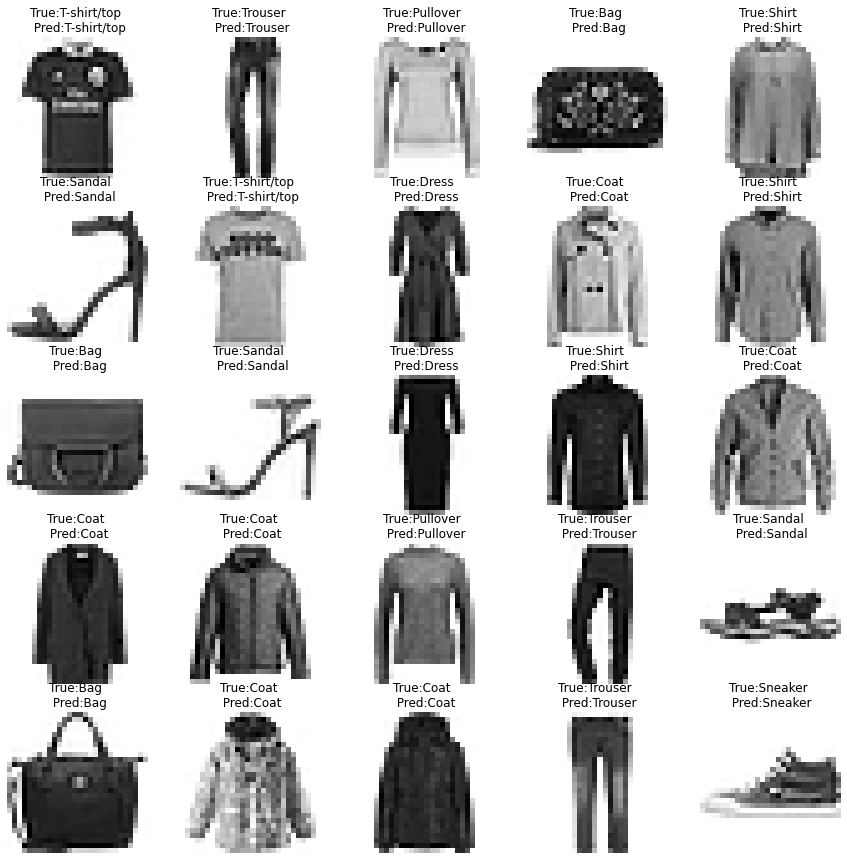

In [ ]:
visualize_images(correct)

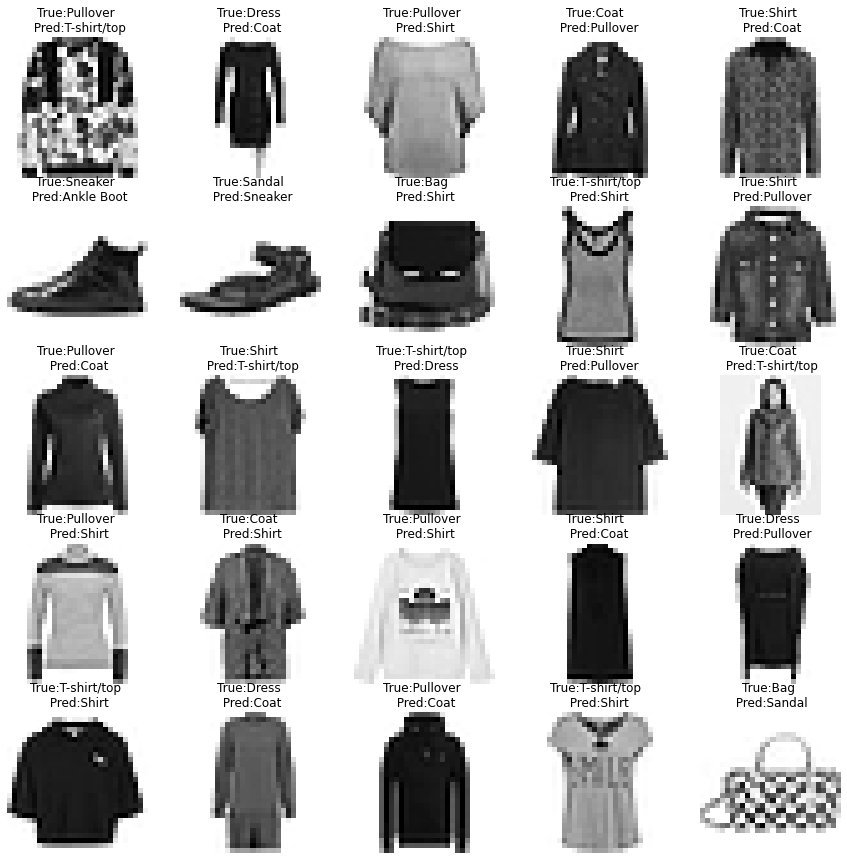

In [ ]:
visualize_images(incorrect)

**Benchmark**

Loss: 0.4197 

Accuracy: 0.8576